In [1]:
import pandas as pd #For data manipulation
import numpy as np #Separating emotions
import glob #For file directories
import os
import soundfile #Creating sound files
import sys
import librosa #For audio analysis
import librosa.display
#import seaborn as sbn
import matplotlib.pyplot as plt #Plotting
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report #Showing emotion features
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from IPython.display import Audio

import scipy.io.wavfile
from scipy.fftpack import dct

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [23]:
RavdessData = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/RAVDESS_Baseline/"
CasiaData = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/CASIA_Baseline/"
EmodbData = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/EmoDB_Baseline/"
UrduData = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/URDU_Baseline/"
Combined = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Baseline/"

In [62]:
# Extracting RAVDESS data
fileEmotion_RAVDESS = []
filePath_RAVDESS= []
RavdessList = os.listdir(RavdessData)
for dir in RavdessList:
    if dir[16] == '1':
        x = 'n'
    elif dir[16] == '3':
        x = 'h'
    elif dir[16] == '4':
        x = 's'
    elif dir[16] == '5':
        x = 'a'
    save = Combined + x +'_'+'R'+'_'+dir
    signal, sr = librosa.load(RavdessData+dir)
    soundfile.write(save, signal, sr)
#df = pd.DataFrame({'Label':filePath_RAVDESS, 'Path': filePath_RAVDESS})

In [63]:
# Extracting Emodb data
EmodbList = os.listdir(EmodbData)
for dir in EmodbList:
    #filePath.append(EmodbData+dir)
    #print(dir[5])
    if dir[5] == 'N':
        x = 'n'
    elif dir[5] == 'F':
        x = 'h'
    elif dir[5] == 'T':
        x = 's'
    elif dir[5] == 'W':
        x = 'a'
    save = Combined + x +'_'+'E'+'_'+dir
    signal, sr = librosa.load(EmodbData+dir)
    soundfile.write(save, signal, sr)
    
#df = pd.DataFrame({'Label':filePath_RAVDESS, 'Path': filePath_RAVDESS})

In [64]:
# Extracting Emodb data
CasiaList = os.listdir(CasiaData)
for dir in CasiaList:
    #filePath.append(EmodbData+dir)
    save = Combined + dir[4] +'_'+'C'+'_'+dir
    signal, sr = librosa.load(CasiaData+dir)
    soundfile.write(save, signal, sr)
#df = pd.DataFrame({'Label':filePath_RAVDESS, 'Path': filePath_RAVDESS})

In [65]:
# Extracting Emodb data
   
for dir in UrduList:
    #filePath.append(EmodbData+dir)
    save = Combined + dir[0] +'_'+'U'+'_'+dir
    signal, sr = librosa.load(UrduData+dir)
    soundfile.write(save, signal, sr)
#df = pd.DataFrame({'Label':filePath_RAVDESS, 'Path': filePath_RAVDESS})

In [66]:
emotionList = []
CombinedList = os.listdir(Combined)
for dir in CombinedList:
    if dir[0] == 'n': #Neutral
        x = 3
    elif dir[0] == 'h': #Happy
        x = 0
    elif dir[0] == 's': #Sad
        x = 1
    elif dir[0] == 'a': #Angry
        x = 2
    emotionList.append(x)
print(len(emotionList))

2211


In [67]:
pathList = []
for dir in CombinedList:
    pathList.append(dir)

In [68]:
df = pd.DataFrame({'Label':emotionList, 'Path':pathList})
df

,Label,Path
0,2,a_C_201-angry-liuchanhg.wav
1,2,a_C_201-angry-wangzhe.wav
2,2,a_C_201-angry-zhaoquanyin.wav
3,2,a_C_201-angry-ZhaoZuoxiang.wav
4,2,a_C_202-angry-liuchanhg.wav
...,...,...
2206,1,s_U_s_SM27_F4_S096.wav
2207,1,s_U_s_SM6_F1_S097.wav
2208,1,s_U_s_SM6_F2_S098.wav
2209,1,s_U_s_SM6_F3_S099.wav


In [69]:
title = []
for path in df.Path:
    title.append(path[0:3])
df['Title'] = title

In [70]:
df['Title'].value_counts()

a_C    200
h_C    200
n_C    200
s_C    200
a_R    192
h_R    192
s_R    192
a_E    127
a_U    100
h_U    100
n_U    100
s_U    100
n_R     96
n_E     79
h_E     71
s_E     62
Name: Title, dtype: int64

In [71]:
destination = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Baseline_Shortened/"
CombinedList = os.listdir(Combined)
countaC = 0
counthC = 0
countnC = 0
countsC = 0
countaR = 0
counthR = 0
countnR = 0
countsR = 0
countaE = 0
counthE = 0
countnE = 0
countsE = 0
countaU = 0
counthU = 0
countnU = 0
countsU = 0
for dir in CombinedList:
    if dir[0:3] == 'a_C':
        countaC = countaC + 1
        if countaC <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'h_C':
        counthC = counthC + 1
        if counthC <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'n_C':
        countnC = countnC + 1
        if countnC <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 's_C':
        countsC = countsC + 1
        if countsC <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'a_R':
        countaR = countaR + 1
        if countaR <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'h_R':
        counthR = counthR + 1
        if counthR <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'n_R':
        countnR = countnR + 1
        if countnR <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 's_R':
        countsR = countsR + 1
        if countsR <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'a_E':
        countaE = countaE + 1
        if countaE <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'h_E':
        counthE = counthE + 1
        if counthE <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'n_E':
        countnE = countnE + 1
        if countnE <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 's_E':
        countsE = countsE + 1
        if countsE <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'a_U':
        countaU = countaU + 1
        if countaU <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'h_U':
        counthU = counthU + 1
        if counthU <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 'n_U':
        countnU = countnU + 1
        if countnU <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)
    elif dir[0:3] == 's_U':
        countsU = countsU + 1
        if countsU <= 62:
            signal, sr = librosa.load(Combined+dir)
            soundfile.write(destination+dir, signal, sr)


In [76]:
destination = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Baseline_Shortened_Cropped/"
home = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Baseline_Shortened/"
homeList = os.listdir(home)
fileDuration = []
label =[]
for dir in homeList:
    signal, sr = librosa.load(home+dir)
    fileDuration.append(len(signal))
    label.append(dir[0])

a    248
h    248
n    248
s    248
Name: Label, dtype: int64

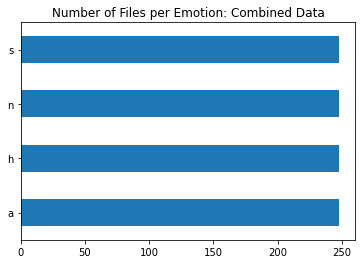

In [77]:
df = pd.DataFrame({'Label':label, 'Duration':fileDuration})
distribution = df['Label'].value_counts().plot(kind='barh', title='Number of Files per Emotion: Combined Data')
df['Label'].value_counts()


In [78]:
avgDuration = sum(df['Duration'])/len(df['Duration'])
minDuration = min(df['Duration'])
maxDuration = max(df['Duration'])
print(avgDuration/sr)
print(minDuration/sr)
print(maxDuration/sr)

df["Duration_sec"] = df['Duration']/sr 

2.8199886621315193
2.0
4.0


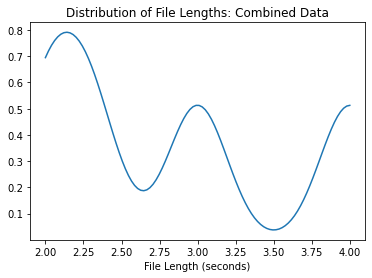

75.0% of files have a length shorter than 3.00 seconds.


In [79]:
#plt.plot(np.array(fileDuration))
#plt.show()
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

pdf = gaussian_kde(df['Duration_sec'])#, bins = 30)#.plot(kind='kde', title="Distribution of File Lengths: EmoDB")
x = np.linspace(df['Duration_sec'].min(), df['Duration_sec'].max(), 100)
plt.plot(x,pdf(x))
plt.xlabel("File Length (seconds)")
plt.title("Distribution of File Lengths: Combined Data")
plt.show()

cdf = df['Duration_sec'].value_counts(normalize=True).sort_index().cumsum()

threshold = 0.75
point = cdf[cdf <= threshold].index.max()
print(f"{threshold*100}% of files have a length shorter than {point:.2f} seconds.")
# 5 seconds is good to cut

In [80]:
setfileDuration = 3*sr # set file duration to 4 seconds
destination = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Baseline_Shortened_Cropped/"
home = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Baseline_Shortened/"
homeList = os.listdir(home)
fileDuration = []
label =[]
i = 0
for dir in homeList:
    signal, sr = librosa.load(home+dir)
    savePath = destination + dir
    if df['Duration_sec'][i] != setfileDuration :
            # crop soundwave 
        trimmedFiles = librosa.util.fix_length(signal, int(setfileDuration))
        soundfile.write(savePath, trimmedFiles, sr)
    else:
        soundfile.write(savePath, signal, sr)
    i = i+1
    

In [81]:
import librosa
from os import listdir
from os.path import isfile, join
data = []
label = []
Path = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/Combined_Baseline_Shortened_Cropped/"
files = [f for f in listdir(Path) if isfile(join(Path, f))]
for x in files:
    filePath = Path + x
    label.append(x[0])
    signal, sr = librosa.load(filePath, sr=None)
    #mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 20) 
    mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18) 
    #mfcc_1d = np.ravel(mfcc)
    data.append(mfcc)

In [82]:
data = np.array(data)
data.shape

(992, 18, 259)

In [83]:
X = np.expand_dims(data, axis=3)
X.shape

(992, 18, 259, 1)

In [84]:
label

['a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a'

In [85]:
label_new = []
for i in range(len(label)):
    if label[i] == 'n': #Neutral
        x=3
    elif label[i] == 'h': #Happy
        x=0
    elif label[i] == 's': #S
        x=1
    elif label[i] == 'a': #Angry
        x = 2
    label_new.append(x)

print(label_new)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [86]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

In [87]:
x_train, x_test, y_train, y_test = train_test_split(X, label_new, test_size = 0.2)

In [88]:
X_train = np.array(x_train)
X_test = np.array(x_test)
Y_train = np.array(y_train)
Y_test = np.array(y_test)
print(Y_train.shape)

(793,)


In [94]:
# This model gives 68% - 82%, 20 epochs, update 78% with 30 mfcc
model = Sequential()
from keras.layers import BatchNormalization
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(18, 259, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=4, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 18, 259, 64)       640       
                                                                 
 batch_normalization_10 (Bat  (None, 18, 259, 64)      256       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 18, 259, 64)       36928     
                                                                 
 batch_normalization_11 (Bat  (None, 18, 259, 64)      256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 129, 64)       0         
 2D)                                                             
                                                      

In [91]:
best_val_acc = 0.0
best_epoch = None
num_epochs = 5
count = 0
Epoch_list = [1, 2 ,3,4,5,6, 8, 10, 14, 16, 18, 20, 24]
HistoryData = []
Val_loss_Data = []
Val_Acc_Data = []

for Loop_Var in Epoch_list:
    # Train the model for one epoch
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, batch_size=32 , epochs=Loop_Var , verbose=1, validation_data=(X_test, Y_test))
    HistoryData.append(history)

    # Evaluate the model on the validation set
    val_loss, val_acc = model.evaluate(X_test, Y_test, batch_size=32, verbose=1)
    Val_loss_Data.append(val_loss)
    Val_Acc_Data.append(val_acc)

    # Check if this epoch had the best validation accuracy so far
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_epoch = Loop_Var
        # Save the model weights for the best epoch
        model.save_weights('best_model_weights.h5')
    count = count + 1
    print(count)
print('Loop Completed')
# Load the weights for the best epoch
model.load_weights('best_model_weights.h5')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size=32, verbose=1)

print("Best epoch: {} with validation accuracy: {}".format(best_epoch, best_val_acc))
print("Test loss: {} Test accuracy: {}".format(test_loss, test_acc))

7/7 [==============================] - 3s 435ms/step - loss: 30.9832 - accuracy: 0.2714
1
Epoch 1/2
25/25 [==============================] - 63s 2s/step - loss: 1.2857 - accuracy: 0.5032 - val_loss: 22.9391 - val_accuracy: 0.3568
Epoch 2/2
7/7 [==============================] - 3s 447ms/step - loss: 20.9158 - accuracy: 0.2814
2
Epoch 1/3
25/25 [==============================] - 59s 2s/step - loss: 0.8559 - accuracy: 0.6885 - val_loss: 25.4852 - val_accuracy: 0.2764
Epoch 2/3
25/25 [==============================] - 57s 2s/step - loss: 0.5600 - accuracy: 0.7831 - val_loss: 9.0133 - val_accuracy: 0.3015
Epoch 3/3
7/7 [==============================] - 3s 452ms/step - loss: 4.0195 - accuracy: 0.4171
3
Epoch 1/4
25/25 [==============================] - 61s 2s/step - loss: 0.3956 - accuracy: 0.8537 - val_loss: 6.9361 - val_accuracy: 0.3367
Epoch 2/4
25/25 [==============================] - 59s 2s/step - loss: 0.2883 - accuracy: 0.8852 - val_loss: 3.0133 - val_accuracy: 0.5226
Epoch 3/4
25/2

Epoch 1/16
25/25 [==============================] - 109s 4s/step - loss: 0.0135 - accuracy: 0.9962 - val_loss: 1.6653 - val_accuracy: 0.7085
Epoch 2/16
25/25 [==============================] - 91s 4s/step - loss: 0.0212 - accuracy: 0.9950 - val_loss: 1.3822 - val_accuracy: 0.7337
Epoch 3/16
25/25 [==============================] - 84s 3s/step - loss: 0.0215 - accuracy: 0.9912 - val_loss: 2.0447 - val_accuracy: 0.6734
Epoch 4/16
25/25 [==============================] - 81s 3s/step - loss: 0.0394 - accuracy: 0.9899 - val_loss: 2.2335 - val_accuracy: 0.6583
Epoch 5/16
25/25 [==============================] - 74s 3s/step - loss: 0.0169 - accuracy: 0.9950 - val_loss: 1.5507 - val_accuracy: 0.7136
Epoch 6/16
25/25 [==============================] - 75s 3s/step - loss: 0.0149 - accuracy: 0.9962 - val_loss: 1.5447 - val_accuracy: 0.7186
Epoch 7/16
25/25 [==============================] - 75s 3s/step - loss: 0.0094 - accuracy: 0.9987 - val_loss: 1.4708 - val_accuracy: 0.7035
Epoch 8/16
25/25 [=

25/25 [==============================] - 65s 3s/step - loss: 0.0069 - accuracy: 0.9962 - val_loss: 1.7312 - val_accuracy: 0.7337
Epoch 4/24
25/25 [==============================] - 66s 3s/step - loss: 0.0087 - accuracy: 0.9975 - val_loss: 1.6535 - val_accuracy: 0.7588
Epoch 5/24
25/25 [==============================] - 61s 2s/step - loss: 0.0144 - accuracy: 0.9962 - val_loss: 1.5463 - val_accuracy: 0.7487
Epoch 6/24
25/25 [==============================] - 59s 2s/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 1.3262 - val_accuracy: 0.7487
Epoch 7/24
25/25 [==============================] - 89s 4s/step - loss: 0.0114 - accuracy: 0.9950 - val_loss: 1.4254 - val_accuracy: 0.7638
Epoch 8/24
25/25 [==============================] - 100s 4s/step - loss: 0.0068 - accuracy: 0.9975 - val_loss: 1.4564 - val_accuracy: 0.7387
Epoch 9/24
25/25 [==============================] - 90s 4s/step - loss: 0.0095 - accuracy: 0.9975 - val_loss: 1.7638 - val_accuracy: 0.7437
Epoch 10/24
25/25 [===========

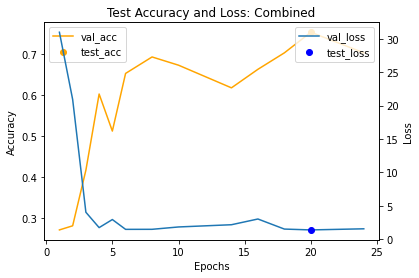

In [92]:
# Plot the test loss and accuracy
#plt.plot(history.history['loss'], label='train_loss')
fig, ax1 = plt.subplots()
ax1.plot(Epoch_list, Val_Acc_Data, label='val_acc', color='orange')
ax1.plot(best_epoch, test_acc, 'o', label='test_acc', color='orange')
ax1.legend()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Test Accuracy and Loss: Combined')

#plt.plot(history.history['accuracy'], label='train_acc')
ax2 =ax1.twinx()

ax2.plot(Epoch_list, Val_loss_Data, label='val_loss')
ax2.plot(best_epoch, test_loss, 'o', label='test_loss', color='blue')   
ax2.legend()
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
#ax2.set_title('Test Loss')

plt.show()


In [1]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# assuming y_true and y_pred are numpy arrays of the true and predicted labels
# y_true and y_pred should have the same length and correspond to the same samples
import numpy as np

# assuming x_test and y_test are the test set inputs and labels
# and model is your trained CNN model

# make predictions on the test set
y_pred = model.predict(x_test)

# define y_true as the one-hot encoded version of the test labels
y_true = np.zeros((len(y_test), 4)) # 4 is the number of emotions being classified
y_true[np.arange(len(y_test)), y_test] = 1
#y_true = y_test

# convert y_pred from probabilities to class labels
predicted_labels = np.argmax(y_pred, axis=1)

# define y_pred as the one-hot encoded version of the predicted labels
y_pred = np.zeros((len(predicted_labels), 4)) # 4 is the number of emotions being classified
y_pred[np.arange(len(predicted_labels)), predicted_labels] = 1


cm = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1))
labels = ['Happy', 'Sad', 'Angry', 'Neutral'] # replace with your own emotion labels

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: Combined Data')

# show the plot
plt.show()


NameError: name 'model' is not defined